## Chahd's preprocessing & feature selection (removal of some columns)

In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
x_train = pd.read_csv(r"C:\Users\leila\Downloads\x_train_transformed.csv")
y_train = pd.read_csv(r"C:\Users\leila\Downloads\y_train.csv")

In [3]:
x_train['SalePrice'] = y_train

In [4]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,-0.6,-0.018097,-0.291776,-0.5,1.0,-0.312500,-0.973684,0.000000,0.745492,0.0,...,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,145000
1,0.2,-0.597045,-0.428667,0.0,2.0,0.437500,0.000000,0.000000,-0.533287,0.0,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,178000
2,-0.4,-0.175992,-0.200109,-0.5,2.0,-1.291667,-1.157895,0.000000,-0.533287,0.0,...,6.0,2.0,1.0,2.0,4.0,4.0,1.0,8.0,4.0,85000
3,0.0,-0.544413,-0.583551,-0.5,2.0,-0.729167,-1.157895,1.518072,0.255895,0.0,...,6.0,4.0,5.0,2.0,4.0,4.0,2.0,8.0,4.0,175000
4,0.0,-1.070729,-1.118473,-0.5,1.0,-1.000000,-1.157895,0.000000,-0.230929,0.0,...,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,4.0,127000


In [5]:
x_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'Garage

In [6]:
setup(data=x_train, target='SalePrice', session_id=123)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 73)"
4,Transformed data shape,"(1168, 73)"
5,Transformed train set shape,"(817, 73)"
6,Transformed test set shape,"(351, 73)"
7,Numeric features,72
8,Preprocess,True
9,Imputation type,simple


In [7]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17191.4247,906177739.1869,28388.3740,0.8551,0.1368,0.0981,0.1420
lightgbm,Light Gradient Boosting Machine,17649.3271,959653296.1481,29375.4754,0.8477,0.1409,0.1005,0.1680
rf,Random Forest Regressor,18288.1620,945323454.5689,29515.2957,0.8476,0.1484,0.1070,0.3740
et,Extra Trees Regressor,19082.9571,1077397367.2498,31166.8296,0.8292,0.1510,0.1100,0.3160
ada,AdaBoost Regressor,23794.9096,1249529696.4541,34640.2753,0.7912,0.1951,0.1535,0.0780
ridge,Ridge Regression,21942.7886,1472608990.8638,35365.2921,0.7770,0.1793,0.1256,0.0500
llar,Lasso Least Angle Regression,22034.1545,1478200302.8938,35433.6780,0.7762,0.1794,0.1261,0.0180
lr,Linear Regression,22060.1887,1480416450.0020,35466.2569,0.7758,0.1803,0.1264,1.0990
lasso,Lasso Regression,22054.9889,1479976517.2053,35459.3798,0.7758,0.1802,0.1263,0.0570
en,Elastic Net,22057.2398,1504983942.8638,36112.0327,0.7703,0.1645,0.1236,0.0410


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17074.0369,514995072.1254,22693.5029,0.8897,0.1468,0.1073
1,15394.2278,446619921.5657,21133.3841,0.9039,0.1050,0.0813
2,18588.0575,1962351173.6342,44298.4331,0.6488,0.1531,0.0973
3,15488.2710,462390585.0162,21503.2692,0.8933,0.1200,0.0922
4,13478.0507,337972754.7616,18384.0353,0.9316,0.1016,0.0787
5,15701.8826,466332387.2366,21594.7305,0.9067,0.1223,0.0921
6,22767.1922,2464126547.1199,49639.9692,0.7231,0.1565,0.1069
7,16636.5729,647736734.0434,25450.6726,0.8990,0.1743,0.1153
8,16649.1055,762922743.4306,27621.0562,0.8532,0.1321,0.0947


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17639.7602,776915383.9502,27873.2019,0.8336,0.1477,0.1027
1,18911.9433,727892954.4604,26979.4914,0.8434,0.1299,0.0991
2,18792.4988,2665927931.7880,51632.6247,0.5229,0.1651,0.0991
3,16046.4300,512380785.2754,22635.8297,0.8818,0.1177,0.0939
4,15124.7251,572347701.0819,23923.7894,0.8842,0.1083,0.0818
5,17282.5229,652008377.1076,25534.4547,0.8696,0.1312,0.0985
6,23772.7352,2604988712.4151,51039.0900,0.7073,0.1621,0.1088
7,16922.5581,541355599.0672,23267.0496,0.9156,0.1680,0.1166
8,14664.8941,610413909.6337,24706.5560,0.8826,0.1288,0.0897


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

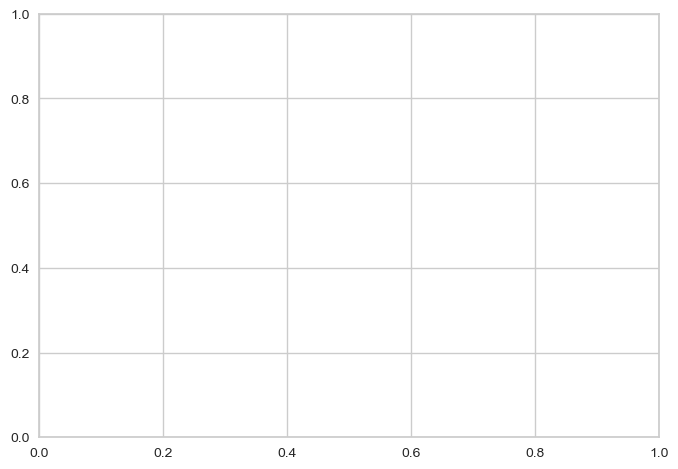

In [8]:
model = create_model('gbr') 
tuned_model = tune_model(model)
evaluate_model(tuned_model)

In [9]:
final_model = finalize_model(tuned_model)

In [10]:
new_data = pd.read_csv(r"C:\Users\leila\Downloads\x_test_transformed.csv")

In [11]:
predictions = predict_model(final_model, data=new_data)

In [12]:
predictions

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,prediction_label
0,-0.6,-0.018097,-0.288372,0.0,3.0,-0.187500,0.236842,0.000000,0.386269,0.0,...,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,147045.506632
1,0.2,1.455587,0.645797,1.0,0.0,0.458333,0.026316,2.180723,0.898058,0.0,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,338658.760358
2,-0.4,-0.754939,-0.155614,-0.5,1.0,-0.937500,-1.157895,0.000000,-0.533287,0.0,...,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,4.0,121309.209782
3,0.0,-1.070729,-1.118473,0.0,2.0,-0.520833,-1.157895,0.000000,0.020111,0.0,...,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,4.0,156441.730606
4,-0.6,0.981903,0.801897,1.5,0.0,0.729167,0.368421,0.421687,0.884189,0.0,...,6.0,0.0,1.0,0.0,4.0,4.0,2.0,8.0,4.0,332497.237900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-0.4,-1.070729,-0.893563,-1.0,2.0,-0.729167,0.157895,2.620482,-0.300277,0.0,...,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,2.0,112631.002623
288,-0.6,2.824008,1.594553,0.5,0.0,0.687500,0.289474,0.096386,1.233703,0.0,...,6.0,2.0,1.0,0.0,4.0,4.0,2.0,8.0,4.0,244929.549275
289,0.2,-0.386518,-0.340648,0.5,0.0,0.687500,0.289474,0.000000,0.365465,0.0,...,6.0,2.0,1.0,0.0,4.0,4.0,2.0,8.0,4.0,186580.714648
290,0.4,-0.544413,-0.125464,-1.0,0.0,-0.666667,-1.157895,0.000000,-0.533287,0.0,...,6.0,2.0,5.0,2.0,1.0,3.0,1.0,8.0,4.0,115730.267598
